In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


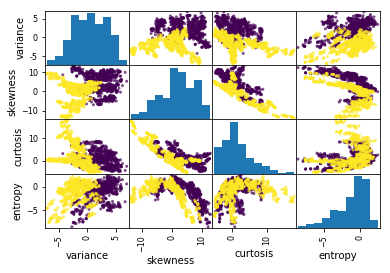

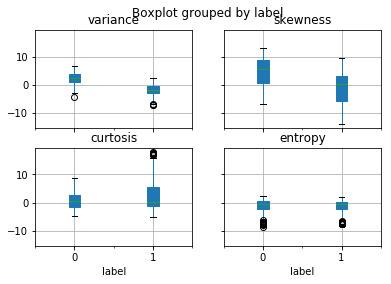

In [140]:
nameattribute = ["variance","skewness","curtosis","entropy"]
#import data with attribute
data = pd.read_csv("5591.txt" , names = nameattribute+ ['label'])
#split data as attribute and label
attribute = pd.DataFrame(data, columns = nameattribute)
label = pd.DataFrame(data, columns = ['label'])
#plot data
pd.plotting.scatter_matrix(attribute, alpha = 0.7, c = data['label'])
#boxplot data
data.boxplot(column = nameattribute, by = 'label',  patch_artist = True, boxprops = {'facecolor':'#ffff00','color':'green'}, )

#split into test set and training set
class0 = data.loc[data.label==0, :]
class0t = class0[0:200]
class0t_x = pd.DataFrame(class0t, columns = nameattribute1+ nameattribute2+nameattribute3+nameattribute4)
class0t_y = pd.DataFrame(class0t, columns = ['label'])


class1 = data.loc[data.label==1, :]
class1t = class1[0:200]
class1t_x = pd.DataFrame(class1t, columns = nameattribute1+ nameattribute2+nameattribute3+nameattribute4)
class1t_y = pd.DataFrame(class1t, columns = ['label'])

[r0,c0] = class0.shape
[r1,c1] = class1.shape
#test data
testdata_x=np.array(class0t_x.append(class1t_x))
testdata_y=np.array(class0t_y.append(class1t_y))

class0tr = class0[201:r0]
class1tr = class1[201:r0]
class0tr_x = pd.DataFrame(class0tr, columns = nameattribute1+ nameattribute2+nameattribute3+nameattribute4)
class0tr_y = pd.DataFrame(class0tr, columns = ['label'])

class1tr_x = pd.DataFrame(class1tr, columns = nameattribute1+ nameattribute2+nameattribute3+nameattribute4)
class1tr_y = pd.DataFrame(class1tr, columns = ['label'])

#training data
trainingdata_x=np.array(class0tr_x.append(class1tr_x))
trainingdata_y=np.array(class0tr_y.append(class1tr_y))

when k equal to  [ 1  4  7 10 13 16 19]
the test accuracy are all 100%
Owning to reduce the complexity of the model, i choose the largest k, which is  19


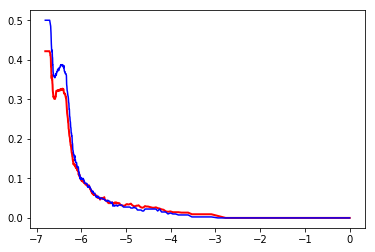

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
min_error = np.empty([1,0])
#built a array of k from 1 to 901, step is 3 as K
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
K = np.arange(1, 904, 3)
for k in K :
     knn = KNeighborsClassifier(n_neighbors = k)
     knn.fit(trainingdata_x,trainingdata_y.ravel())
     train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
     y_predict = knn.predict(testdata_x)
     test_acc = np.append(test_acc,accuracy_score(testdata_y, y_predict))
K.astype(float)
K_inv = 1.0/K
f, ax = plt.subplots()
ax.plot(np.log(K_inv), 1-train_acc, label = 'train error', color = 'red', linewidth =2)
ax.plot(np.log(K_inv), 1-test_acc, label = 'test error', color = 'blue')   
#legend = ax.legend('train accuracy','test accuracy') 
ta = np.max(test_acc)
index = np.where(test_acc == ta)
print ('when k equal to ', K[index])
print ('the test accuracy are all 100%')
min_error = np.append(min_error,1-ta)
max_index = np.max(index)
k_best = 1.0/K_inv[max_index]
k_best = int(k_best)
print ('Owning to reduce the complexity of the model, i choose the largest k, which is ', k_best)

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(trainingdata_x,trainingdata_y.ravel())
y_predict = knn.predict(testdata_x)
cf_matrix = confusion_matrix(testdata_y, y_predict)
print (cf_matrix)

TP = cf_matrix[0,0]
TN = cf_matrix[1,1]
FP = cf_matrix[0,1]
FN = cf_matrix[1,0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('TPR',TPR)
print('TNR',TNR)
#precision, and F-score 

answer = knn.predict_proba(testdata_x)[:,1]
report = answer>0.5
print(classification_report(testdata_y.ravel(), report))

[[200   0]
 [  0 200]]
TPR 1.0
TNR 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       200
          1       1.00      1.00      1.00       200

avg / total       1.00      1.00      1.00       400



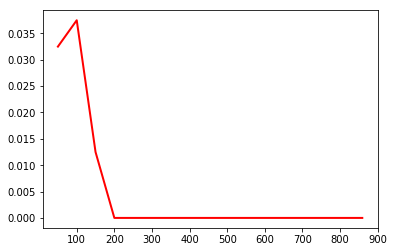

In [20]:
#downsize sample,Plot the best error rate, which is obtained by some value of k, against the size of training set
N = np.arange(50,950,50)
size_sample = np.empty([1,0])
error_best = np.empty([1,0])
for n in N:
    X_train = np.array(class0tr_x[0:int(n/2)].append(class1tr_x[0:int(n/2)]))
    Y_train = np.array(class0tr_y[0:int(n/2)].append(class1tr_y[0:int(n/2)]))
    n_sample = Y_train.shape[0] 
    size_sample=np.append(size_sample,n_sample)
    train_acc = np.empty([1,0])
    test_acc = np.empty([1,0])
    k= 1
    while(k<n_sample):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train,Y_train.ravel())
        train_acc = np.append(train_acc,accuracy_score( Y_train, knn.predict( X_train)))
        y_predict = knn.predict(testdata_x)
        test_acc = np.append(test_acc,accuracy_score(testdata_y, y_predict))
        k=k+40
    index = np.where(test_acc == np.max(test_acc))
    max_index = np.max(index)
    error_best = np.append(error_best,1-test_acc[max_index])
    min_error = np.append(min_error,np.min(error_best))
fig, ax = plt.subplots()
#要加个label
ax.plot(size_sample, error_best,label=None, color = 'red',linewidth = 2)


In [155]:
#other matrics  Summarizethe test errors (i.e., when k = k∗
# in a table. Use all of your training data and select the best k when k ∈ {1, 11, 21, . . . , 901}.
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
error_test = np.empty([1,0])
K = np.arange(1, 911, 10)
for k in K :
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(trainingdata_x,trainingdata_y.ravel())
    train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
    y_predict = knn.predict(testdata_x)
    ta = accuracy_score(testdata_y, y_predict)
    test_acc = np.append(test_acc,ta)
    error_test = np.append(error_test,1-ta)
index = np.where(test_acc == np.max(test_acc))
max_index = np.max(index)
k_best = K[max_index]
min_error = np.append(min_error,np.min(error_best))

print ('when k equal to ', K[index])
print ('the test accuracy are all 100%')
print ('Owning to reduce the complexity of the model, i choose the largest k, so the best k for minkowski when p=1 is ', k_best)
x=np.vstack((K,error_test))
x=pd.DataFrame(x)
print(x)

when k equal to  [ 1 11]
the test accuracy are all 100%
Owning to reduce the complexity of the model, i choose the largest k, so the best k for minkowski when p=1 is  11
    0     1        2        3        4        5      6        7        8   \
0  1.0  11.0  21.0000  31.0000  41.0000  51.0000  61.00  71.0000  81.0000   
1  0.0   0.0   0.0025   0.0075   0.0025   0.0025   0.01   0.0125   0.0225   

      9   ...         81     82     83     84     85     86     87     88  \
0  91.00  ...    811.000  821.0  831.0  841.0  851.0  861.0  871.0  881.0   
1   0.02  ...      0.495    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

      89     90  
0  891.0  901.0  
1    0.5    0.5  

[2 rows x 91 columns]


In [159]:
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
error_test = np.empty([1,0])
Q = np.arange(0.1, 1.1, 0.1)
#np.exp10(log_p)
for q in Q :
    knn = KNeighborsClassifier(n_neighbors=k_best, metric='minkowski', p=np.power(10,q))
    knn.fit(trainingdata_x,trainingdata_y.ravel())
    train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
    y_predict = knn.predict(testdata_x)
    ta = accuracy_score(testdata_y, y_predict)
    test_acc = np.append(test_acc,ta)
    error_test = np.append(error_test,1-ta)
index = np.where(test_acc == np.max(test_acc))
min_error = np.append(min_error,np.min(error_best))
max_index = np.max(index)
q_best = Q[max_index]  
print ('when log10(p) equal to ', Q[index])
print ('the test accuracy are all 100%')
print ('Owning to reduce the time complexity of the model, i choose the log10(p)=1')

when log10(p) equal to  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
the test accuracy are all 100%
Owning to reduce the time complexity of the model, i choose the log10(p)=1


In [163]:
#cheb
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
error_test = np.empty([1,0])
K = np.arange(1, 911, 10)
for k in K :
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(trainingdata_x,trainingdata_y.ravel())
    train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
    y_predict = knn.predict(testdata_x)
    ta = accuracy_score(testdata_y, y_predict)
    test_acc = np.append(test_acc,ta)
    error_test = np.append(error_test,1-ta)
index = np.where(test_acc == np.max(test_acc))
max_index = np.max(index)
k_best = K[max_index]
print ('when k equal to ', K[index])
print ('the test accuracy are all 100%')
print ('Owning to reduce the complexity of the model, i choose the largest k, so the best k for chebyshev is ', k_best)
min_error = np.append(min_error,np.min(error_best))
x=np.vstack((K,error_test))
x=pd.DataFrame(x)
print(x)

when k equal to  [ 1 11]
the test accuracy are all 100%
Owning to reduce the complexity of the model, i choose the largest k, so the best k for chebyshev is  11
    0     1        2      3        4       5      6       7       8       9   \
0  1.0  11.0  21.0000  31.00  41.0000  51.000  61.00  71.000  81.000  91.000   
1  0.0   0.0   0.0025   0.01   0.0125   0.015   0.02   0.025   0.025   0.025   

   ...       81     82     83     84     85     86     87     88     89     90  
0  ...    811.0  821.0  831.0  841.0  851.0  861.0  871.0  881.0  891.0  901.0  
1  ...      0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  

[2 rows x 91 columns]
0.0


In [165]:
#mahalanobis
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
error_test = np.empty([1,0])
K = np.arange(1, 911, 10)
X=trainingdata_x
for k in K :
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute" ,metric='mahalanobis',metric_params={'V': np.cov(X)})
    knn.fit(trainingdata_x,trainingdata_y.ravel())
    train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
    y_predict = knn.predict(testdata_x)
    ta = accuracy_score(testdata_y, y_predict)
    test_acc = np.append(test_acc,ta)
    error_test = np.append(error_test,1-ta)
index = np.where(test_acc == np.max(test_acc))
max_index = np.max(index)
k_best = K[max_index]
print ('when k equal to ', K[index])
print ('the test accuracy are all 100%')
print ('Owning to reduce the complexity of the model, i choose the largest k, so the best k for mahalanobis is ', k_best)
min_error = np.append(min_error,np.min(error_best))
x=np.vstack((K,error_test))
x=pd.DataFrame(x)
print(x)

when k equal to  [ 1 11]
the test accuracy are all 100%
Owning to reduce the complexity of the model, i choose the largest k, so the best k for mahalanobis is  11
    0     1       2       3       4        5      6       7       8       9   \
0  1.0  11.0  21.000  31.000  41.000  51.0000  61.00  71.000  81.000  91.000   
1  0.0   0.0   0.005   0.005   0.005   0.0075   0.01   0.005   0.005   0.005   

   ...       81     82     83     84     85     86     87     88     89     90  
0  ...    811.0  821.0  831.0  841.0  851.0  861.0  871.0  881.0  891.0  901.0  
1  ...      0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  

[2 rows x 91 columns]


In [167]:
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
error_test = np.empty([1,0])
K = np.arange(1, 911, 10)
for k in K :
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    knn.fit(trainingdata_x,trainingdata_y.ravel())
    train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
    y_predict = knn.predict(testdata_x)
    ta = accuracy_score(testdata_y, y_predict)
    test_acc = np.append(test_acc,ta)
    error_test = np.append(error_test,1-ta)
index = np.where(test_acc == np.max(test_acc))
max_index = np.max(index)
k_best = K[max_index]
print ('when k equal to ', K[index])
print ('the test accuracy are all 100%')
print ('The best error for Euclidean is ', np.min(error_test))
min_error = np.append(min_error,np.min(error_best))
#x=np.vstack((K,error_test))
#x=pd.DataFrame(x)
#print(x)

when k equal to  [ 1 11 21 31 41 51]
the test accuracy are all 100%
The best error for Euclidean is  0.0


In [168]:
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
error_test = np.empty([1,0])
K = np.arange(1, 911, 10)
for k in K :
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric='minkowski', p=1)
    knn.fit(trainingdata_x,trainingdata_y.ravel())
    train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
    y_predict = knn.predict(testdata_x)
    ta = accuracy_score(testdata_y, y_predict)
    test_acc = np.append(test_acc,ta)
    error_test = np.append(error_test,1-ta)
index = np.where(test_acc == np.max(test_acc))
max_index = np.max(index)
k_best = K[max_index]
print ('when k equal to ', K[index])
print ('the test accuracy are all 100%')
print ('The best error for minkowski when p=1 is ', np.min(error_test))
min_error = np.append(min_error,np.min(error_best))
#x=np.vstack((K,error_test))
#x=pd.DataFrame(x)
#print(x)

when k equal to  [ 1 11 21 31 41 51 61 71 81]
the test accuracy are all 100%
The best error for minkowski when p=1 is  0.0
    0     1     2     3     4     5     6     7     8        9     ...     \
0  1.0  11.0  21.0  31.0  41.0  51.0  61.0  71.0  81.0  91.0000    ...      
1  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0025    ...      

         81        82        83      84      85        86      87        88  \
0  811.0000  821.0000  831.0000  841.00  851.00  861.0000  871.00  881.0000   
1    0.0625    0.0625    0.0625    0.07    0.07    0.0675    0.07    0.0725   

         89        90  
0  891.0000  901.0000  
1    0.0725    0.0725  

[2 rows x 91 columns]


In [170]:
train_acc = np.empty([1,0])
test_acc = np.empty([1,0])
error_test = np.empty([1,0])
K = np.arange(1, 911, 10)
for k in K :
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric='chebyshev')
    knn.fit(trainingdata_x,trainingdata_y.ravel())
    train_acc = np.append(train_acc,accuracy_score(trainingdata_y, knn.predict(trainingdata_x)))
    y_predict = knn.predict(testdata_x)
    ta = accuracy_score(testdata_y, y_predict)
    test_acc = np.append(test_acc,ta)
    error_test = np.append(error_test,1-ta)
index = np.where(test_acc == np.max(test_acc))
max_index = np.max(index)
k_best = K[max_index]
print ('when k equal to ', K[index])
print ('the test accuracy are all 100%')
print ('The best error for chebyshev is ', np.min(error_test))
min_error = np.append(min_error,np.min(error_best))
#x=np.vstack((K,error_test))
#x=pd.DataFrame(x)
#print(x)

when k equal to  [  1  11  21  31 271 281 291 301 311 321 331 341 351 361 371 381 391 401
 411 421 431 441 451 461 471 481]
the test accuracy are all 100%
The best error for chebyshev is  0.0


In [173]:
print('the min error in this exercise is ',np.min(min_error))

the min error in this exercise is  0.0
